In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
from lifelines import KaplanMeierFitter, statistics

In [3]:
RANDOM_STATE = 0

In [4]:
dat_km = pd.read_csv("data/survival_data.csv")

In [5]:
T = dat_km.dropna().loc[:,'TIEMPO LIBRE DE ENFERMEDAD_TODOS']
C = dat_km.dropna().loc[:,'EVOL_METASTASIS']

In [6]:
sub_dat_km = dat_km.dropna().loc[:,["HIST_BRESLOW_mm", "GM-CSF", "IL-4", "Dermicidina"]]
sub_dat_km.head()

,HIST_BRESLOW_mm,GM-CSF,IL-4,Dermicidina
0,1.35,147.18,24.03,6534.467
1,0.50,290.40,37.21,14336.631
2,0.72,261.07,49.21,8780.811
3,0.30,37.58,40.61,7649.131
4,7.00,236.31,50.18,7406.295


In [7]:
# We use previously computed splitting rule
def plane_equation(breslow, gm_csf, il4, dcd):
    
    eq = breslow/1.41 - gm_csf/562.64 + il4/161.81 - dcd/9871.12
    
    if eq >= 0.99:
        return True
    else:
        return False

In [8]:
met_prediction = []
for ii in range(sub_dat_km.shape[0]):
    breslow, gm_csf, il4, dcd = sub_dat_km.iloc[ii,0],\
    sub_dat_km.iloc[ii,1],\
    sub_dat_km.iloc[ii,2],\
    sub_dat_km.iloc[ii,3]
    
    met_prediction.append(plane_equation(breslow=breslow, 
                                         gm_csf = gm_csf,
                                         il4 = il4,
                                         dcd = dcd))
met_prediction = np.array(met_prediction)

In [9]:
kmf = KaplanMeierFitter()

In [10]:
g_high_text = r'$\left(\frac{\bf Breslow}{1.41}\right) \
- \left(\frac{\bf GM-CSF}{562.64}\right) + \left(\frac{\bfIL-4 }{161.81} \right) \
- \left(\frac{\bf DCD}{9871.12} \right) > 0.99$'

g_low_text = r'$\left(\frac{\bf Breslow}{1.41}\right) \
- \left(\frac{\bf GM-CSF}{562.64}\right) + \left(\frac{\bf IL-4 }{161.81} \right) \
- \left(\frac{\bf DCD}{9871.12} \right) < 0.99$'

0    0.5
dtype: float64
0    0.5
dtype: float64


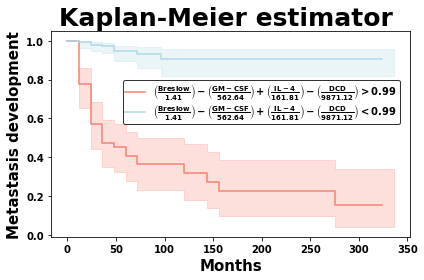

In [11]:
fig, ax = plt.subplots()
kmf = KaplanMeierFitter()
kmf.fit(T[met_prediction], event_observed=C[met_prediction], timeline=np.arange(0, max(T[met_prediction]), 12), 
        label= g_high_text)

kmf.plot(ax=ax, c='salmon')

kmf.fit(T[~met_prediction], event_observed=C[~met_prediction], timeline=np.arange(0,  max(T[met_prediction]), 12), 
        label=g_low_text)

kmf.plot(ax=ax, c= 'lightblue')
plt.legend(loc=(0.2, 0.55), prop = {'weight':'bold'}, edgecolor="black", labelspacing=0.1, borderpad=0.25)
plt.title('Kaplan-Meier estimator ',size=25, weight='bold')

plt.xticks(size=10, weight='bold')
plt.yticks(size=10, weight='bold')
plt.tight_layout()
plt.xlabel('Months',size=15,weight='bold')
plt.ylabel('Metastasis development',size=15,weight='bold')
plt.tight_layout()
#plt.savefig('plots/survival.svg', dpi = 300)
pass

In [12]:
results = statistics.logrank_test(T[met_prediction], T[~met_prediction],
                                  C[met_prediction], C[~met_prediction], alpha=.99)
print("Log rank testing for the subjects stratification based on this plane p = ", results.p_value )

('Log rank testing for the subjects stratification based on this plane p = ', 1.2577754904412573e-27)
